In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

from datetime import datetime, timedelta

plt.style.use('dark_background')
mpl.rcParams['axes.unicode_minus'] = False
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
plt.rc('font', family=font_name)

# Load Big 5 Dataset

In [3]:
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Emotional Stability 안정성(신경성)
]

neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 Openness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'EST2','EST4',                       # 2 Emotional Stability
]

usecols = pos_questions + neg_questions + ['country']

df = pd.read_csv('dataset/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t', usecols=usecols) # tsv

print(len(df))

df.head()

1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


## Drop Rows Contains 0

In [4]:
df = df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)

print(len(df))

df.head()

874366


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


## Filter Countries

In [5]:
df_2 = (df.groupby('country').agg('count')['EXT1'] > 100).reset_index()

fc = df_2[df_2['EXT1'] == True]['country']

df = df[df['country'].isin(fc)].reset_index(drop=True)

df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872089,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
872090,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
872091,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
872092,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


## Positive Negative Scores

In [6]:
df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,GB
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,...,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,MY
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,...,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,GB
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,...,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,GB
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,KE


## Compute Scores

In [7]:
traits = {
    'OPN': '개방성',
    'CSN': '성실성',
    'EXT': '외향성',
    'AGR': '친화성',
    'EST': '안정성'
}

for trait, trait_kor in traits.items():
    trait_cols = sorted([col for col in df.columns if trait in col])
    df[trait_kor] = df[trait_cols].sum(axis=1)

df_traits = df[list(traits.values()) + ['country']].copy()
df_traits.head()

,개방성,성실성,외향성,친화성,안정성,country
0,15.0,2.0,16.0,9.0,-6.0,GB
1,5.0,7.0,-10.0,14.0,-5.0,MY
2,11.0,4.0,-5.0,12.0,-4.0,GB
3,9.0,-5.0,-4.0,8.0,-1.0,GB
4,18.0,18.0,-1.0,16.0,-11.0,KE


## Distribution Plot

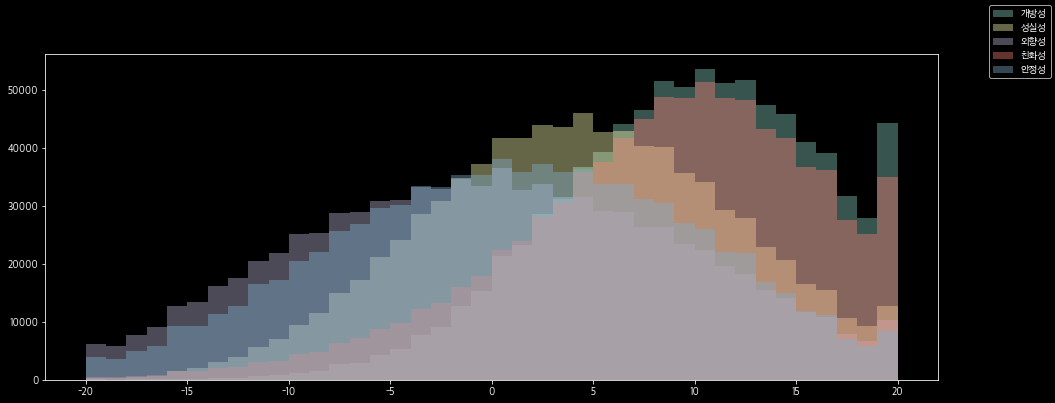

In [8]:
fig = plt.figure(figsize=(16, 6))

for trait in traits.values():
    sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)

fig.legend(traits.values())

## Openness Korea vs Germany

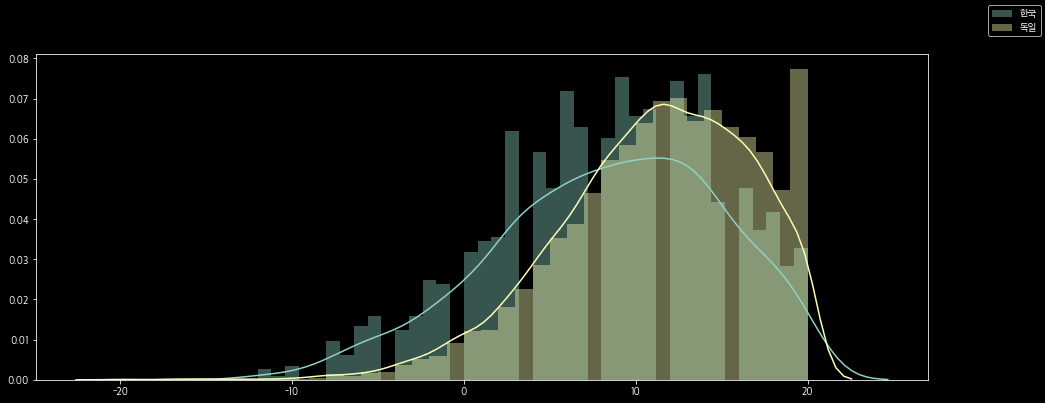

In [9]:
fig = plt.figure(figsize=(16, 6))

sns.distplot(df_traits[df_traits['country'] == 'KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] == 'DE']['개방성'], bins=40, axlabel=False)

fig.legend(['한국', '독일'])

## Compute Mean by Countries

In [10]:
df_traits_mean = df_traits.groupby('country').mean().rename_axis('country').reset_index()

df_traits_mean

,country,개방성,성실성,외향성,친화성,안정성
0,AE,7.639791,4.032090,0.261933,7.917770,1.475732
1,AL,10.188889,3.391667,-1.361111,6.205556,1.361111
2,AR,10.133075,1.678530,-1.654932,6.416248,2.381431
3,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666
4,AU,8.551472,3.626061,-0.062085,7.918328,0.393272
...,...,...,...,...,...,...
108,US,9.105058,4.166036,-0.214579,8.338453,0.366914
109,UY,9.848375,2.137184,-1.902527,6.324910,1.574007
110,VE,10.106996,1.933128,-1.233539,5.512346,1.705761
111,VN,6.272773,2.327828,-2.323323,5.792793,1.590591


# COVID-19 Dataset
- https://github.com/datasets/covid-19
- https://datahub.io/core/country-list

In [11]:
df_covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

df_covid.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


## Country Code

In [12]:
cc = pd.read_csv('dataset/country_code.csv')

cc.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


## Filter Dataset Step 1
- Drop rows Confirmed <= 50
- Sum 'Province/State' level over by country

In [13]:
df_covid = df_covid[df_covid['Confirmed'] > 50].reset_index(drop=True)

df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()

df_covid[df_covid['Country/Region'] == 'US']

,Country/Region,Date,Lat,Long,Confirmed,Recovered,Deaths
13825,US,2020-03-02,37.0902,-95.7129,53.0,7.0,6.0
13826,US,2020-03-03,37.0902,-95.7129,73.0,7.0,7.0
13827,US,2020-03-04,37.0902,-95.7129,104.0,7.0,11.0
13828,US,2020-03-05,37.0902,-95.7129,174.0,7.0,12.0
13829,US,2020-03-06,37.0902,-95.7129,222.0,7.0,14.0
...,...,...,...,...,...,...,...
13933,US,2020-06-18,37.0902,-95.7129,2191052.0,599115.0,118432.0
13934,US,2020-06-19,37.0902,-95.7129,2222579.0,606715.0,119124.0
13935,US,2020-06-20,37.0902,-95.7129,2255119.0,617460.0,119719.0
13936,US,2020-06-21,37.0902,-95.7129,2281290.0,622133.0,119977.0


## Filter Dataset Step 2
- Over 14 days from after 50 confirmed

In [14]:
n_days = 14

filtered = (
    datetime.now() - df_covid.groupby('Country/Region')['Date'].min() > timedelta(days=n_days)
).reset_index().rename(columns={'Date': 'Filtered'})

filtered_countries = filtered[filtered['Filtered'] == True]['Country/Region']

df_covid = df_covid[df_covid['Country/Region'].isin(filtered_countries)]

df_covid_14days = df_covid.groupby('Country/Region').head(n_days).groupby('Country/Region').tail(1)

df_covid_14days

,Country/Region,Date,Lat,Long,Confirmed,Recovered,Deaths
13,Afghanistan,2020-04-06,33.000000,65.000000,367.0,18.0,11.0
104,Albania,2020-03-29,41.153300,20.168300,212.0,33.0,10.0
203,Algeria,2020-03-29,28.033900,1.659600,511.0,31.0,31.0
302,Andorra,2020-04-01,42.506300,1.521800,390.0,10.0,14.0
398,Angola,2020-06-01,-11.202700,17.873900,86.0,18.0,4.0
...,...,...,...,...,...,...,...
14621,Vietnam,2020-03-27,16.000000,108.000000,163.0,20.0,0.0
14722,West Bank and Gaza,2020-04-04,31.952200,35.233200,217.0,21.0,1.0
14815,Yemen,2020-05-23,15.552727,48.516388,212.0,11.0,39.0
14859,Zambia,2020-04-30,-15.416700,28.283300,106.0,55.0,3.0


## Merge All

In [15]:
df_covid_14days = df_covid_14days.merge(cc, left_on='Country/Region', right_on='Name')

df_covid_14days = df_covid_14days.merge(df_traits_mean, left_on='Code', right_on='country')

df_covid_14days.sort_values('Confirmed', ascending=False)

,Country/Region,Date,Lat,Long,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
17,China,2020-02-04,805.2904,2841.0390,23524.0,840.0,490.0,China,CN,CN,6.453737,3.510676,0.095196,7.660142,-0.177046
89,Turkey,2020-03-31,38.9637,35.2433,13531.0,243.0,214.0,Turkey,TR,TR,9.706407,3.132603,-0.768451,6.029197,2.375912
82,Spain,2020-03-14,40.0000,-4.0000,6391.0,517.0,195.0,Spain,ES,ES,10.030204,2.424257,0.021840,7.400558,0.417983
43,Italy,2020-03-06,43.0000,12.0000,4636.0,523.0,197.0,Italy,IT,IT,10.193612,2.803107,-1.071757,6.770291,2.185955
15,Canada,2020-03-26,358.1671,-626.4251,3951.0,0.0,37.0,Canada,CA,CA,9.237147,3.752232,-0.442912,7.870115,0.659691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Trinidad and Tobago,2020-04-05,10.6918,-61.2225,104.0,1.0,7.0,Trinidad and Tobago,TT,TT,9.061125,4.491443,-2.706601,7.601467,1.234719
78,Singapore,2020-02-26,1.2833,103.8333,93.0,62.0,0.0,Singapore,SG,SG,6.591807,3.079186,-1.608106,6.836146,1.158806
5,Bahamas,2020-04-29,25.0343,-77.3963,80.0,23.0,11.0,Bahamas,BS,BS,8.842975,6.173554,-1.165289,8.066116,-2.338843
8,Barbados,2020-04-16,13.1939,-59.5432,75.0,15.0,5.0,Barbados,BB,BB,7.856000,3.208000,-3.320000,7.720000,-0.392000


## Compute Pearson Correlation

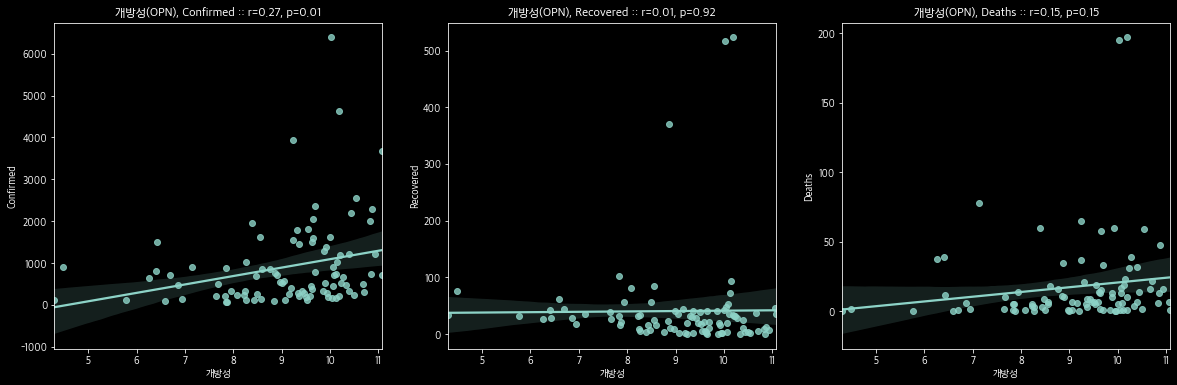

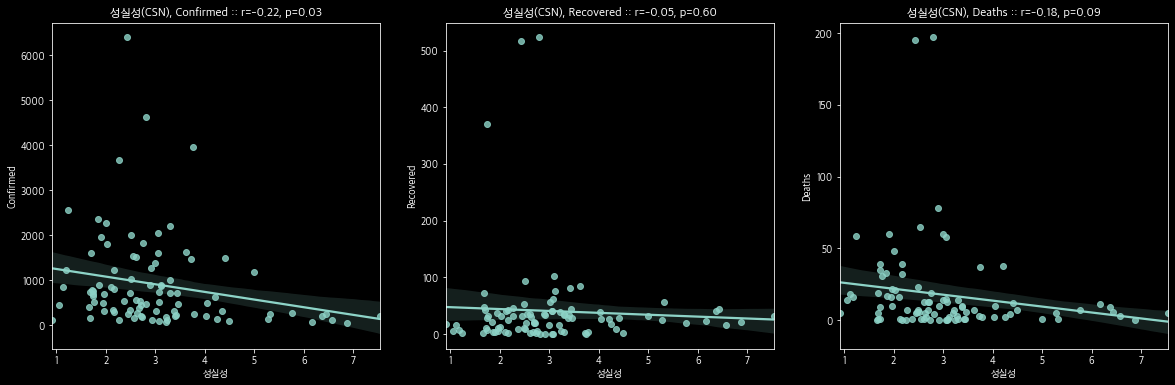

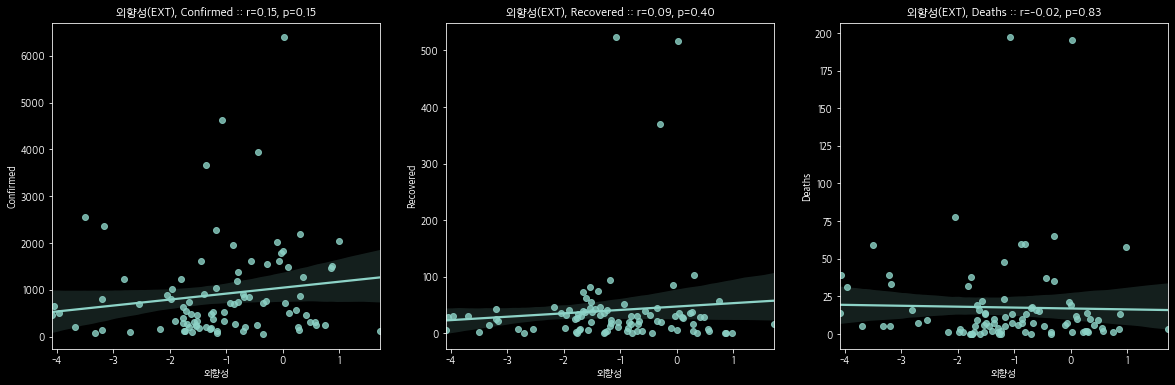

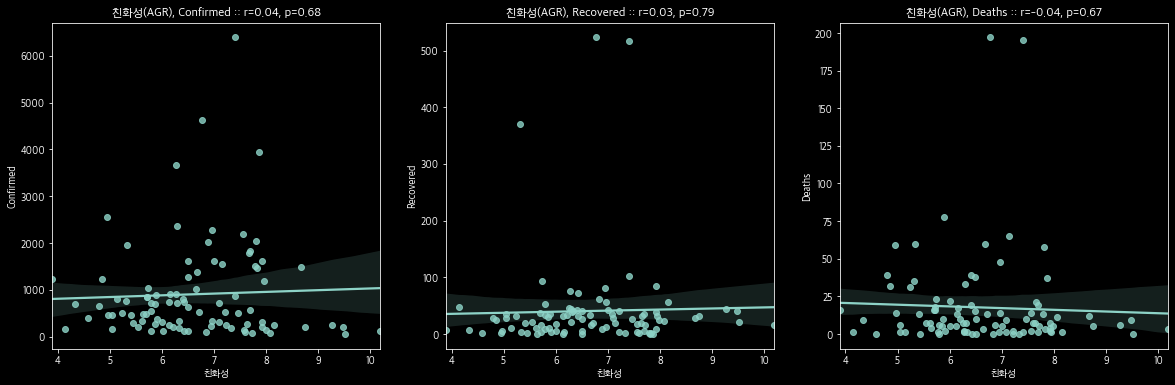

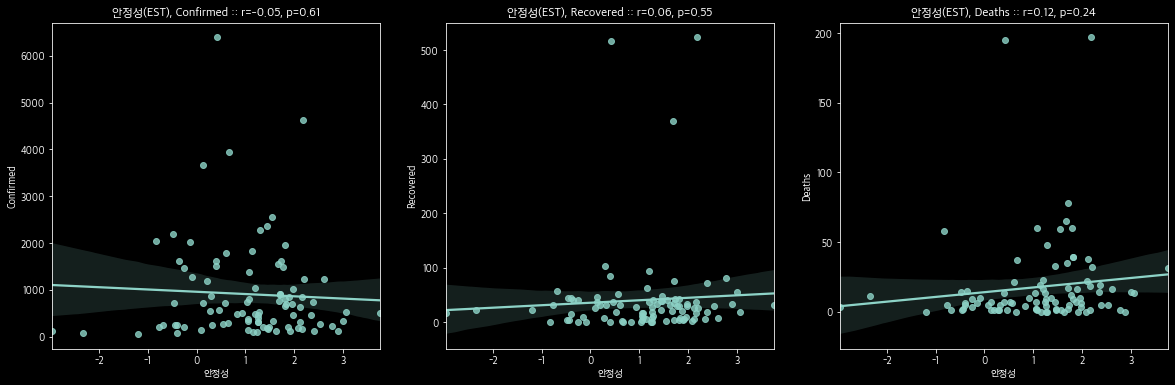

In [19]:
new_df = df_covid_14days[
    ~df_covid_14days['country'].isin(['CN', 'TR'])
]

for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = pearsonr(
            new_df[trait_kor], 
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))

## Sort by Openness

In [17]:
new_df.sort_values('개방성', ascending=False)

,Country/Region,Date,Lat,Long,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
42,Israel,2020-03-21,31.0000,35.0000,712.0,36.0,1.0,Israel,IL,IL,11.083536,3.291971,0.030819,7.085158,0.138686
32,Germany,2020-03-13,51.0000,9.0000,3675.0,46.0,7.0,Germany,DE,DE,11.064345,2.262837,-1.361762,6.261473,0.133023
72,Poland,2020-03-26,51.9194,19.1451,1221.0,7.0,16.0,Poland,PL,PL,10.927395,1.188124,-2.813872,3.890469,2.611776
30,France,2020-03-12,46.2276,2.2137,2281.0,12.0,48.0,France,FR,FR,10.871051,2.003880,-1.184740,6.968964,1.292444
77,Serbia,2020-03-29,44.0165,21.0059,741.0,0.0,13.0,Serbia,RS,RS,10.856000,3.075429,-0.786286,6.137714,1.032571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Bangladesh,2020-04-13,23.6850,90.3563,803.0,42.0,39.0,Bangladesh,BD,BD,6.404669,2.171206,-3.206226,6.404669,1.813230
71,Philippines,2020-03-25,13.0000,122.0000,636.0,26.0,38.0,Philippines,PH,PH,6.259472,4.214388,-1.764388,6.492746,2.128897
60,Nepal,2020-05-09,28.1667,84.2500,110.0,31.0,0.0,Nepal,NP,NP,5.772917,2.260417,-0.697917,6.425000,1.637500
54,Malaysia,2020-03-19,2.5000,112.5000,900.0,75.0,2.0,Malaysia,MY,MY,4.485457,3.113003,-1.398905,6.270903,1.720381


## Use spearmanr Instead of pearsonr

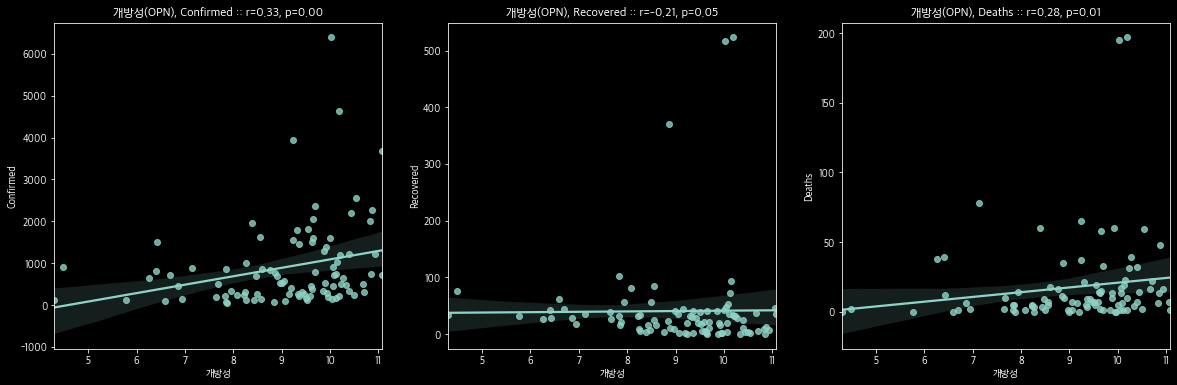

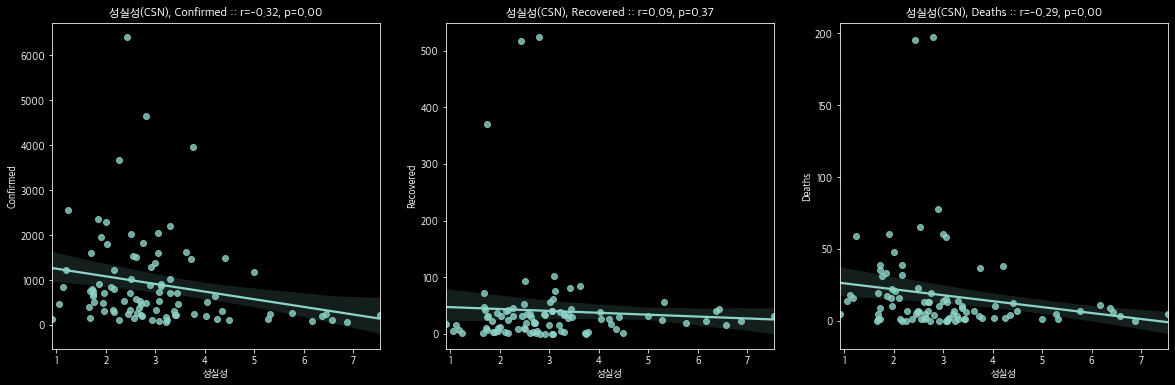

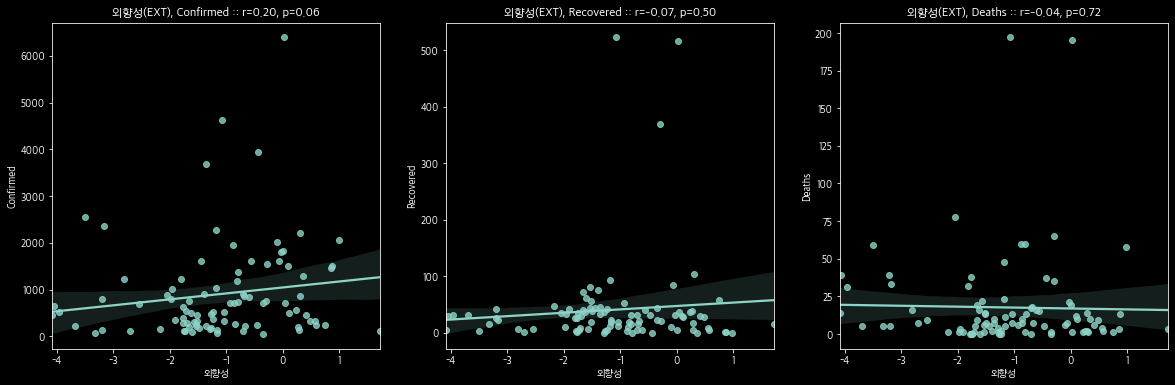

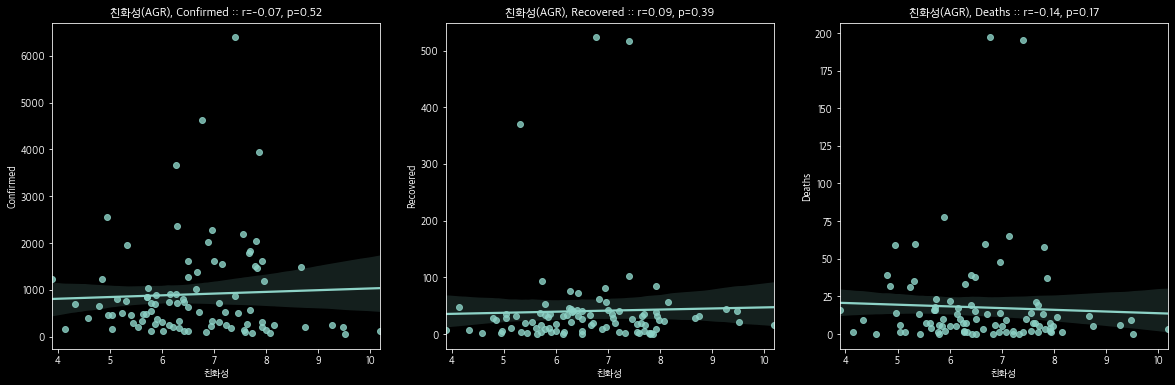

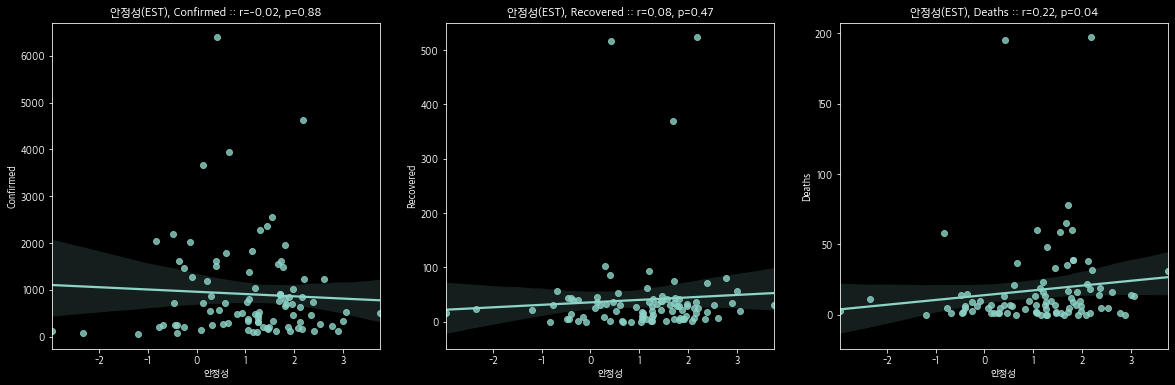

In [20]:
for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = spearmanr(
            new_df[trait_kor], 
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))